# 1. Import Libraries

In [93]:
#Libraries
import os
import pandas as pd
import numpy as np 
import math
#Handling Missing Values
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

#Plots
import seaborn as sns
import matplotlib.pyplot as plt
#Train_test_split
from sklearn.model_selection import train_test_split

# 2. Loading Dataset and Visualize it

In [94]:
df = pd.read_csv('Data_for_Missing_Values.csv') #reading data from csv file
df.head(8) # Seeing the data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes


# 3. Handling Null values and Visualize the data

In [95]:
#No. of missing values
df.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

From the above we can see there are 2 missing values.

# 4. Handling Categorical Variables and Visualizing the data

In [96]:
#Separating categorical n numerical columns
cat_df = df.select_dtypes(include=['object']).copy()
cat_df.head()


,Country,Purchased
0,France,No
1,Spain,Yes
2,Germany,No
3,Spain,No
4,Germany,Yes


In [97]:
# numerical cols
num_df = df.select_dtypes(exclude=['object']).copy()
num_df.head()

,Age,Salary
0,44.0,72000.0
1,27.0,48000.0
2,30.0,54000.0
3,38.0,61000.0
4,40.0,NaN


## 4.1 Style 1

In [100]:
#Converting Purchased column
#We are using ordinal encoder to convert each country to a number from 1,2... so on in order
ord_enc = OrdinalEncoder() #Inbuilt function of sklearn
cat_df["Purchased"] = ord_enc.fit_transform(cat_df[["Purchased"]])
cat_df.head(12) # Notice below that each country is converted to a code.

,Country,Purchased,Country_France,Country_Germany,Country_Spain
0,France,0.0,1.0,0.0,0.0
1,Spain,1.0,0.0,0.0,1.0
2,Germany,0.0,0.0,1.0,0.0
3,Spain,0.0,0.0,0.0,1.0
4,Germany,1.0,0.0,1.0,0.0
5,France,1.0,1.0,0.0,0.0
6,Spain,0.0,0.0,0.0,1.0
7,France,1.0,1.0,0.0,0.0
8,Germany,0.0,0.0,1.0,0.0
9,France,1.0,1.0,0.0,0.0


## 4.2 Style 2

In [101]:
#Handling Categorical columns Style 2
one_enc = OneHotEncoder(sparse=False) #Inbuilt function
cat_df[['Country_France','Country_Germany','Country_Spain']] = one_enc.fit_transform(cat_df['Country'].values.reshape(-1,1))
cat_df

,Country,Purchased,Country_France,Country_Germany,Country_Spain
0,France,0.0,1.0,0.0,0.0
1,Spain,1.0,0.0,0.0,1.0
2,Germany,0.0,0.0,1.0,0.0
3,Spain,0.0,0.0,0.0,1.0
4,Germany,1.0,0.0,1.0,0.0
5,France,1.0,1.0,0.0,0.0
6,Spain,0.0,0.0,0.0,1.0
7,France,1.0,1.0,0.0,0.0
8,Germany,0.0,0.0,1.0,0.0
9,France,1.0,1.0,0.0,0.0


In [102]:
#Now drop the cat column Country.. Since we compared the results 
cat_df.drop(['Country'], axis=1, inplace=True)

In [103]:
#Join these columns in cat_df to our original df
df_final = pd.concat([num_df, cat_df], axis=1)

In [104]:
df_final.head(10)

,Age,Salary,Purchased,Country_France,Country_Germany,Country_Spain
0,44.0,72000.0,0.0,1.0,0.0,0.0
1,27.0,48000.0,1.0,0.0,0.0,1.0
2,30.0,54000.0,0.0,0.0,1.0,0.0
3,38.0,61000.0,0.0,0.0,0.0,1.0
4,40.0,NaN,1.0,0.0,1.0,0.0
5,35.0,58000.0,1.0,1.0,0.0,0.0
6,NaN,52000.0,0.0,0.0,0.0,1.0
7,48.0,79000.0,1.0,1.0,0.0,0.0
8,50.0,83000.0,0.0,0.0,1.0,0.0
9,37.0,67000.0,1.0,1.0,0.0,0.0


In [105]:
#Handling missing Values in numerical columns

# Function to handle Missing value
def Handle_MV(df, columns):
    # apply standardization on numerical features
    for column in columns:
        # creating imputer object with mean method
        imp = SimpleImputer(missing_values=np.nan, strategy='mean')    
        # imputing every column
        imp = imp.fit(df[[column]])
        df[column] = imp.transform(df[[column]])
    
    return df   

In [106]:
#Use this function to fill the missing values
cols = ['Age','Salary']  #Since only thse two columns have missing data
df_full = Handle_MV(df_final,cols).round(decimals=2)
df_full

,Age,Salary,Purchased,Country_France,Country_Germany,Country_Spain
0,44.00,72000.00,0.0,1.0,0.0,0.0
1,27.00,48000.00,1.0,0.0,0.0,1.0
2,30.00,54000.00,0.0,0.0,1.0,0.0
3,38.00,61000.00,0.0,0.0,0.0,1.0
4,40.00,63777.78,1.0,0.0,1.0,0.0
5,35.00,58000.00,1.0,1.0,0.0,0.0
6,38.78,52000.00,0.0,0.0,0.0,1.0
7,48.00,79000.00,1.0,1.0,0.0,0.0
8,50.00,83000.00,0.0,0.0,1.0,0.0
9,37.00,67000.00,1.0,1.0,0.0,0.0


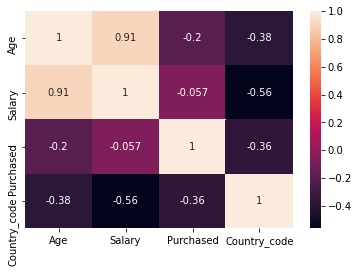

In [77]:
# Visualizing data with correlation plot
corrMatrix = df_full.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

From the above data Salary and age are highly correlated at 0.91
And Age and Country are negatively correlated at 0.56

# 5. Splitting the dataset into training and testing data

In [110]:
# split into train test sets
df_train, df_test = train_test_split(df_full, test_size=0.30)

In [111]:
df_train

,Age,Salary,Purchased,Country_France,Country_Germany,Country_Spain
8,50.0,83000.00,0.0,0.0,1.0,0.0
2,30.0,54000.00,0.0,0.0,1.0,0.0
4,40.0,63777.78,1.0,0.0,1.0,0.0
3,38.0,61000.00,0.0,0.0,0.0,1.0
5,35.0,58000.00,1.0,1.0,0.0,0.0
7,48.0,79000.00,1.0,1.0,0.0,0.0
0,44.0,72000.00,0.0,1.0,0.0,0.0


In [112]:
df_test

,Age,Salary,Purchased,Country_France,Country_Germany,Country_Spain
1,27.00,48000.0,1.0,0.0,0.0,1.0
9,37.00,67000.0,1.0,1.0,0.0,0.0
6,38.78,52000.0,0.0,0.0,0.0,1.0
